# Predicting Customer Churn 
___

### Objective: Predict customer churn in the telecommunications Industry. 

Preventing customer attrition, or churn, is a common business objective. Losing customers results in direct revenue loss, as well as the expenditure of resources to continually find new customers. Brands across all industries are looking for ways to build meaningful bonds with their customers in order to keep them engaged and loyal to the company. In the telecommunications industry, it's a particularly challenging problem as customers in most markets have access to several options.  

### The dataset: [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn/home) 

The Telco Customer Churn dataset contains customer information from a telecommunications company. It includes general demographic information about the customer as well as the various services they were using. It was published by IBM in 2015. 
The raw data contains  7043 rows and 21 columns, with each row being a unique customer. The target variable is **Churn**, whether or not the customer left the company in the last 30 days.  

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

import time

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.25)
sns.set_style('white')

In [17]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [18]:
df.shape

(7043, 21)

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Data Exploratoration and Cleaning

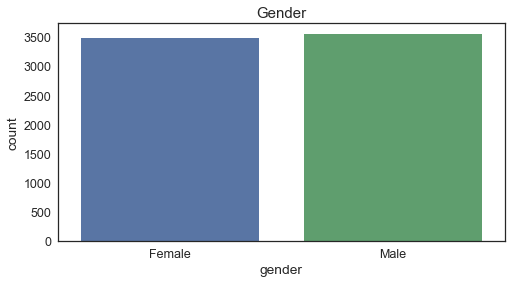

In [55]:
plt.figure(figsize=(8,4))
sns.countplot(x="gender", data=df);
plt.title('Gender')
plt.show()

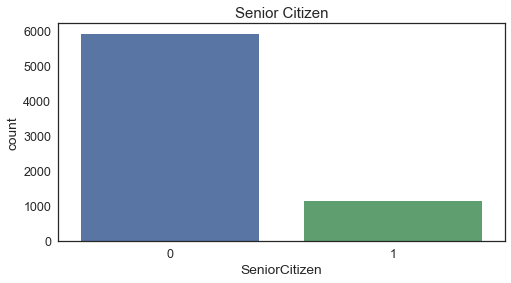

In [56]:
plt.figure(figsize=(8,4))
sns.countplot(x="SeniorCitizen", data=df);
plt.title('Senior Citizen')
plt.show()

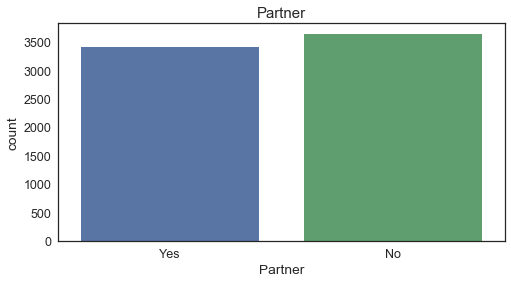

In [57]:
plt.figure(figsize=(8,4))
sns.countplot(x="Partner", data=df);
plt.title('Partner')
plt.show()

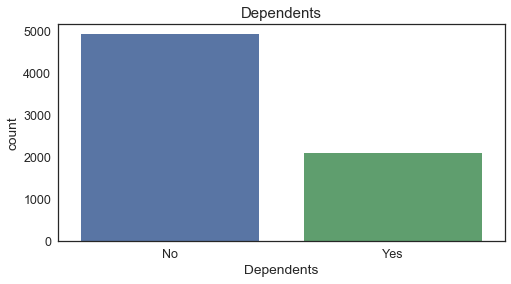

In [58]:
plt.figure(figsize=(8,4))
sns.countplot(x="Dependents", data=df);
plt.title('Dependents')
plt.show()

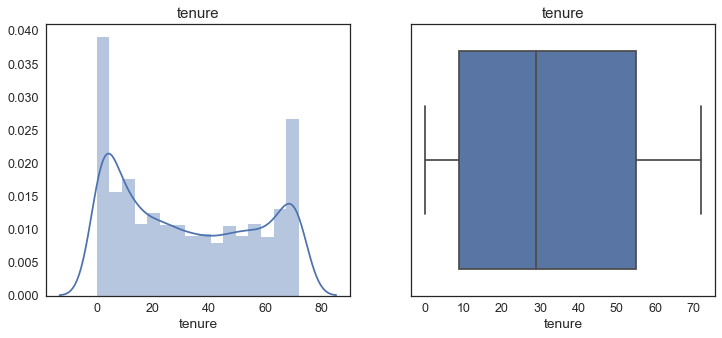

In [59]:
#number of months customer has been with the company
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['tenure'])
plt.title('tenure')

plt.subplot(1, 2, 2)
sns.boxplot(df['tenure'])
plt.title('tenure')

plt.show()

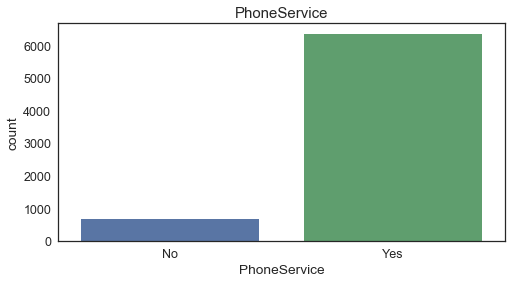

In [60]:
plt.figure(figsize=(8,4))
sns.countplot(x="PhoneService", data=df);
plt.title('PhoneService')


plt.show()

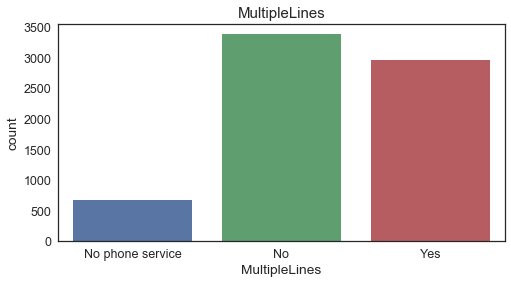

In [61]:
plt.figure(figsize=(8,4))
sns.countplot(x="MultipleLines", data=df);
plt.title('MultipleLines')


plt.show()

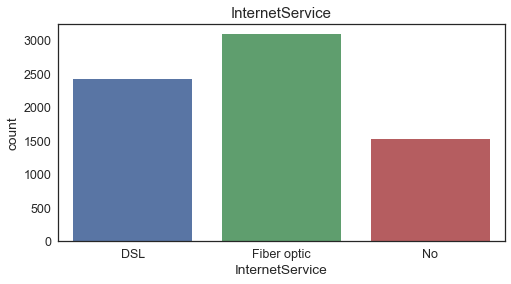

In [62]:
plt.figure(figsize=(8,4))
sns.countplot(x="InternetService", data=df);
plt.title('InternetService')
plt.show()

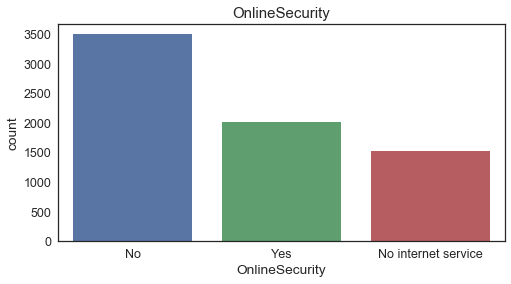

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(x="OnlineSecurity", data=df);
plt.title('OnlineSecurity')
plt.show()

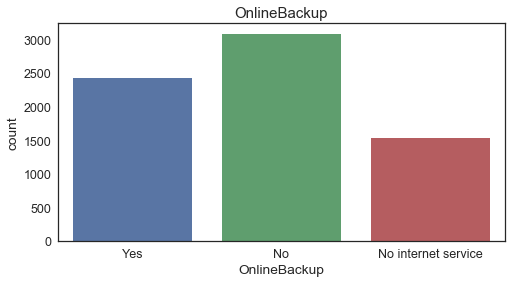

In [64]:
plt.figure(figsize=(8,4))
sns.countplot(x="OnlineBackup", data=df);
plt.title('OnlineBackup')
plt.show()

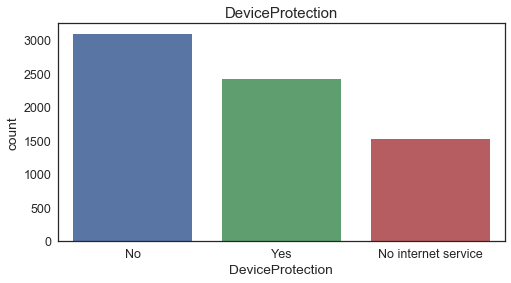

In [65]:
plt.figure(figsize=(8,4))
sns.countplot(x="DeviceProtection", data=df);
plt.title('DeviceProtection')
plt.show()

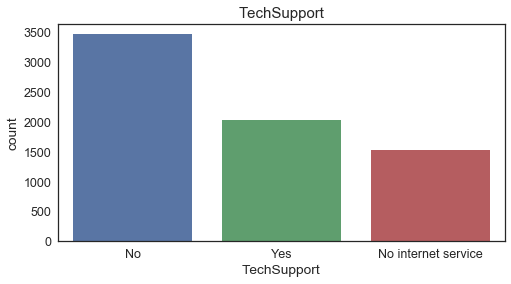

In [66]:
plt.figure(figsize=(8,4))
sns.countplot(x="TechSupport", data=df);
plt.title('TechSupport')


plt.show()

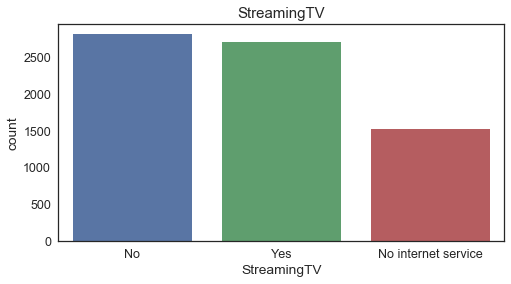

In [67]:
plt.figure(figsize=(8,4))
sns.countplot(x="StreamingTV", data=df);
plt.title('StreamingTV')
plt.show()

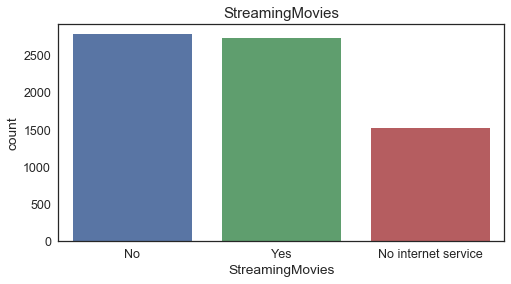

In [68]:
plt.figure(figsize=(8,4))
sns.countplot(x="StreamingMovies", data=df);
plt.title('StreamingMovies')
plt.show()

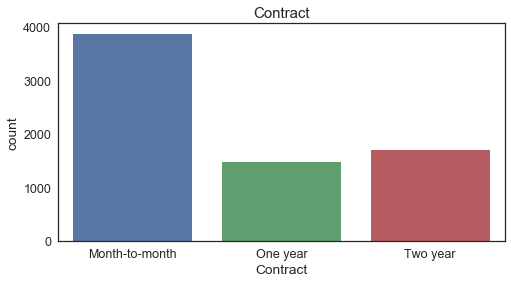

In [69]:
plt.figure(figsize=(8,4))
sns.countplot(x="Contract", data=df);
plt.title('Contract')
plt.show()

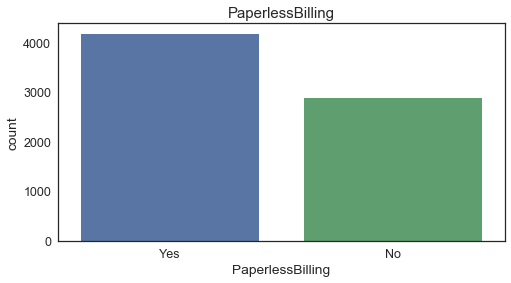

In [70]:
plt.figure(figsize=(8,4))
sns.countplot(x="PaperlessBilling", data=df);
plt.title('PaperlessBilling')
plt.show()

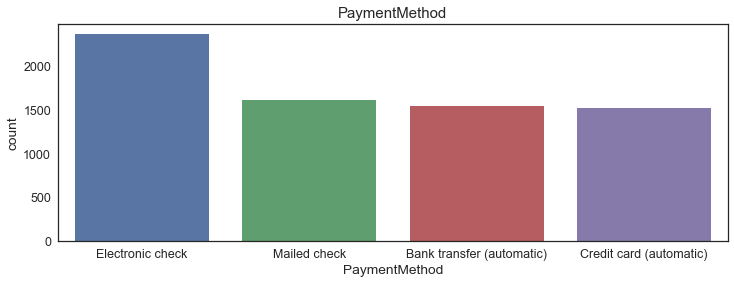

In [71]:
plt.figure(figsize=(12,4))
sns.countplot(x="PaymentMethod", data=df);
plt.title('PaymentMethod')
plt.show()

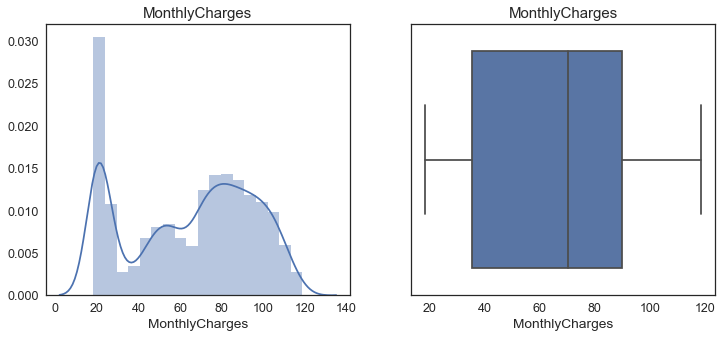

In [72]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.show()

In [73]:
# Total charges is missing some data
len(df[df['TotalCharges'] == ' '])

11

In [19]:
# Dropping rows that are missing total charges so we can convert to float
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float64')

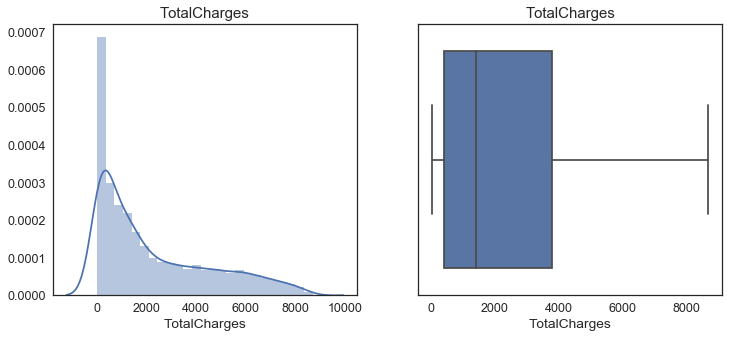

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.subplot(1, 2, 2)
sns.boxplot(df['TotalCharges'])
plt.title('TotalCharges')

plt.show()

# Explore the Target variable 

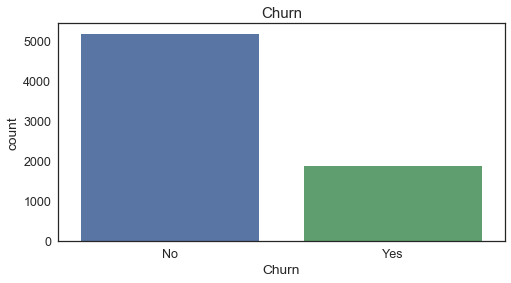

In [76]:
plt.figure(figsize=(8,4))
sns.countplot(x="Churn", data=df);
plt.title('Churn')


plt.show()

##### As PhoneService and SeniorCitizen are both very imbalanced variables, I will drop the subsets of customers who are senior citizens or who don't have phone service.

In [21]:
df = df[df['SeniorCitizen'] == 0 ]

In [22]:
df = df[df['PhoneService'] == 'Yes' ]

In [23]:
len(df[df['Churn'] == 'Yes'])

1267

In [24]:
len(df[df['Churn'] == 'No']) / len(df)

0.7615732028603689

In [25]:
df.shape

(5314, 21)

### To combat the class imbalance of the target variable, the dominant class will be randomly down-sampled to achieve a 50/50 split. 

In [26]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['Churn']=='No']
df_minority = df[df['Churn']=='Yes']

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1267,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Churn.value_counts()


No     1267
Yes    1267
Name: Churn, dtype: int64

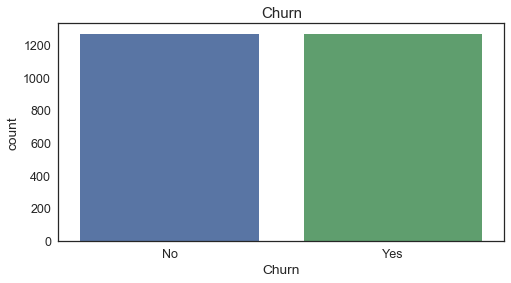

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x="Churn", data=df_downsampled);
plt.title('Churn')


plt.show()

### Benchmark of .5
# Feature Engineering and Selection

In [27]:
#Create dummies
df_downsampled = pd.get_dummies(data=df_downsampled, columns=['gender', 'Partner', 'Dependents','MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
#Drop variables that won't affect target
X = df_downsampled.drop(['customerID', 'Churn', 'SeniorCitizen', 'PhoneService'], axis=1)
df_downsampled['Churn'] = np.where(df_downsampled['Churn'] == 'No', 0, 1)
y = df_downsampled['Churn'].values.reshape(-1, 1)

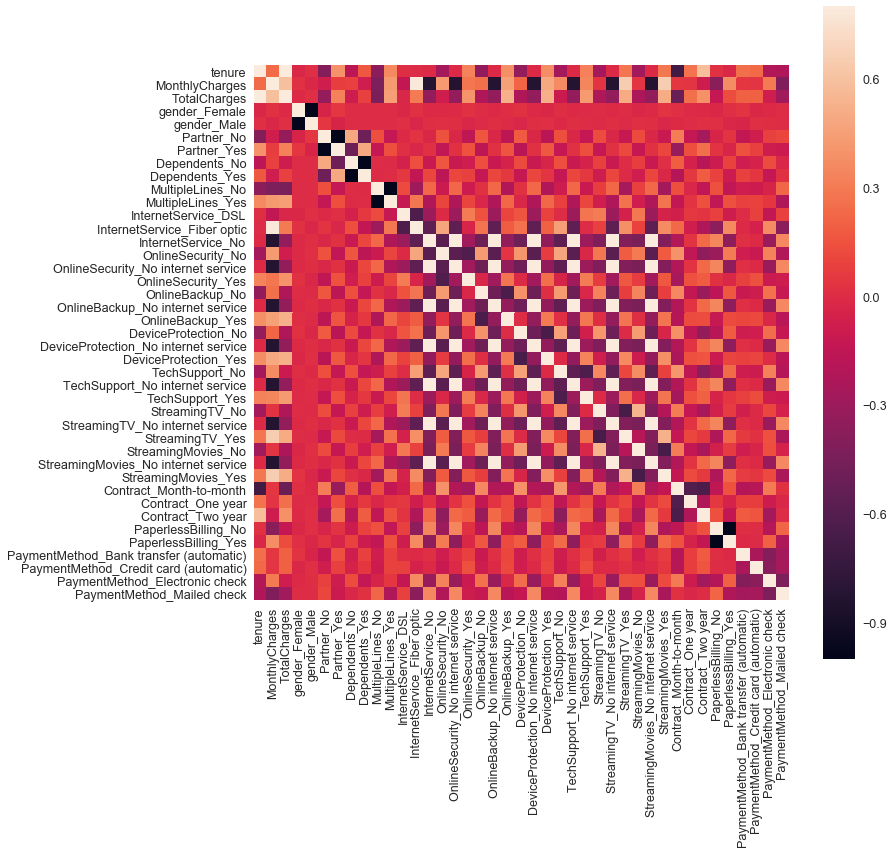

In [28]:
corrmat = X.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Modeling

# Naive Bayes

In [87]:
start_time = time.clock()
# Instantiate and fit model
bnb = BernoulliNB()
bnb.fit(X, y)

#Get Y predictions 
y_pred = bnb.predict(X)

print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))
# Display our results.
print("\nNumber of mislabeled points out of a total {} points : {}".format(
    df_downsampled.shape[0],
    (y_pred != df_downsampled['Churn']).sum().sum()
))


Runtime: 0.01 seconds

Number of mislabeled points out of a total 2534 points : 655


In [88]:
cross_val_score(bnb, X, y, cv=10)

array([0.79133858, 0.77559055, 0.72047244, 0.72047244, 0.75984252,
       0.71259843, 0.67716535, 0.74206349, 0.73412698, 0.76587302])

In [89]:
confusion_matrix(y, y_pred)

array([[ 831,  436],
       [ 219, 1048]], dtype=int64)

In [90]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 436
Type 2 error (false negative): 219
Sensitivity: 0.8271507498026835
Specificity: 0.6558800315706393


# KNN

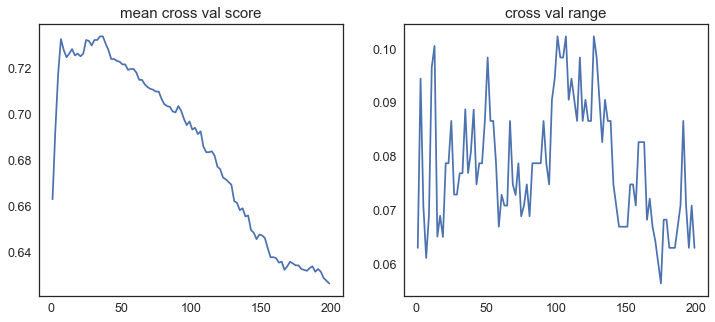

In [91]:
no_neighbors = []
for i in range(1, 200, 2):
    neighbors = KNeighborsClassifier(n_neighbors=i)
    neighbors.fit(X,y)    
    score = cross_val_score(neighbors, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()

    no_neighbors.append([i, mean_score, score_range])

no_neighbors = pd.DataFrame(no_neighbors)
no_neighbors.columns = ['k', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(no_neighbors.k, no_neighbors.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(no_neighbors.k, no_neighbors.score_range)
plt.title('cross val range')

plt.show()

In [92]:
no_neighbors[no_neighbors['mean_score'] == no_neighbors['mean_score'].max()]

,k,mean_score,score_range
17,35,0.734046,0.088770
18,37,0.734046,0.076928


In [93]:
neighbors = KNeighborsClassifier(n_neighbors=37)
neighbors.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=37, p=2,
           weights='uniform')

In [94]:
cross_val_score(neighbors, X, y, cv=10)

array([0.7519685 , 0.73622047, 0.69291339, 0.74409449, 0.75590551,
       0.72440945, 0.69685039, 0.73015873, 0.73809524, 0.76984127])

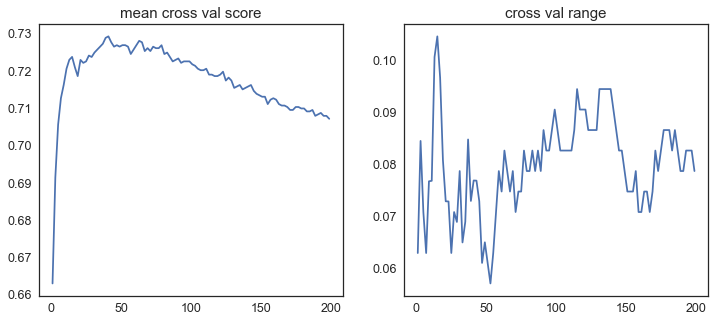

In [95]:
#with distance weighting
no_neighbors = []
for i in range(1, 200, 2):
    neighbors = KNeighborsClassifier(n_neighbors=i, weights='distance')
    neighbors.fit(X,y)    
    score = cross_val_score(neighbors, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()

    no_neighbors.append([i, mean_score, score_range])

no_neighbors = pd.DataFrame(no_neighbors)
no_neighbors.columns = ['k', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(no_neighbors.k, no_neighbors.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(no_neighbors.k, no_neighbors.score_range)
plt.title('cross val range')

plt.show()

In [96]:
no_neighbors[no_neighbors['mean_score'] == no_neighbors['mean_score'].max()]

,k,mean_score,score_range
20,41,0.729299,0.076928


In [97]:
no_neighbors[no_neighbors['score_range'] == no_neighbors['score_range'].min()]

,k,mean_score,score_range
26,53,0.726937,0.057149


In [98]:
start_time = time.clock()

neighbors = KNeighborsClassifier(n_neighbors=53, weights='distance')
y_pred = neighbors.fit(X,y).predict(X)

print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

#confusion matrix
confusion_matrix(y, y_pred)


Runtime: 0.07 seconds


array([[1266,    1],
       [   7, 1260]], dtype=int64)

In [99]:
cross_val_score(neighbors, X, y, cv=10)

array([0.7519685 , 0.71653543, 0.7007874 , 0.72834646, 0.75590551,
       0.70472441, 0.7007874 , 0.71825397, 0.73412698, 0.75793651])

In [100]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 1
Type 2 error (false negative): 7
Sensitivity: 0.994475138121547
Specificity: 0.9992107340173638


# Decision Tree

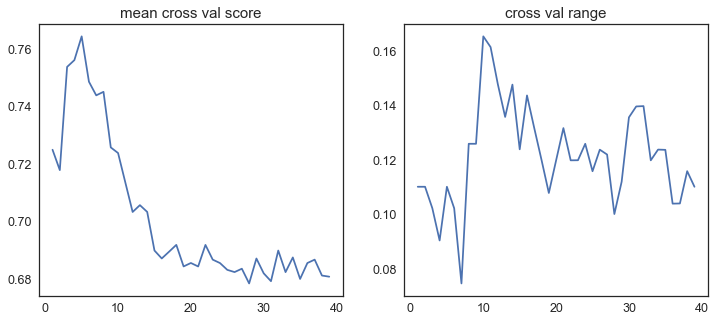

In [101]:
#Tuning Max Depth
param_tune = []
for i in range(1, 40):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    decision_tree.fit(X, y)
    score = cross_val_score(decision_tree, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [102]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
4,5,0.764389,0.110236


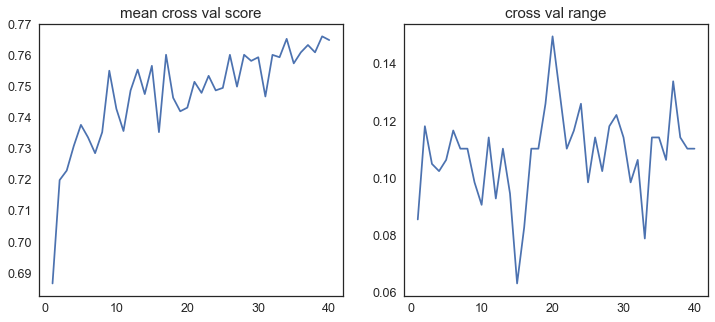

In [103]:
#Tuning Max features
param_tune = []
for i in range(1, 41):
    decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=i)
    decision_tree.fit(X, y)
    score = cross_val_score(decision_tree, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [104]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
38,39,0.765973,0.110236


In [105]:
start_time = time.clock()
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',  max_depth=3, max_features=39)
y_pred = decision_tree.fit(X, y).predict(X)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

confusion_matrix(y, y_pred)


Runtime: 0.01 seconds


array([[923, 344],
       [269, 998]], dtype=int64)

In [106]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 344
Type 2 error (false negative): 269
Sensitivity: 0.7876874506708761
Specificity: 0.728492501973165


In [107]:
cross_val_score(decision_tree, X, y, cv=10)

array([0.80708661, 0.72440945, 0.77165354, 0.7519685 , 0.78740157,
       0.71653543, 0.70472441, 0.70634921, 0.73015873, 0.76587302])

# Random Forest

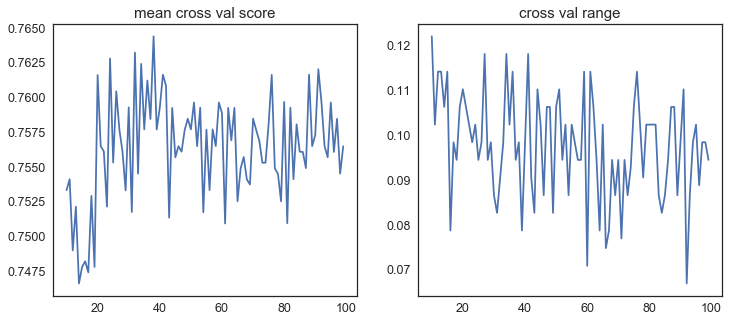

In [108]:
#Tune number of estimators
param_tune = []
for i in np.arange(10, 100):
    rfc = ensemble.RandomForestClassifier(n_estimators=i, max_depth=8, max_features=None)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [110]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
28,38,0.764386,0.098425


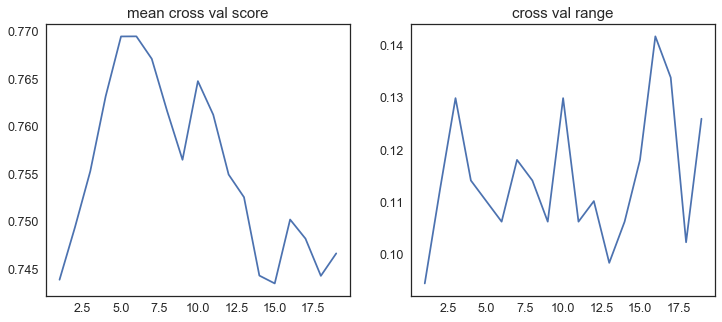

In [29]:
#Tune max depth 
param_tune = []
for i in np.arange(1, 20):
    rfc = ensemble.RandomForestClassifier(n_estimators=38, max_depth=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [112]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
6,7,0.769104,0.129921


In [31]:
# tume max features
param_tune = []
for i in [None, 'sqrt', 'log2']:
    rfc = ensemble.RandomForestClassifier(n_estimators=38, max_depth=7, max_features=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

param_tune

,parameter,mean_score,score_range
0,None,0.762795,0.082677
1,sqrt,0.769919,0.098425
2,log2,0.763986,0.086614


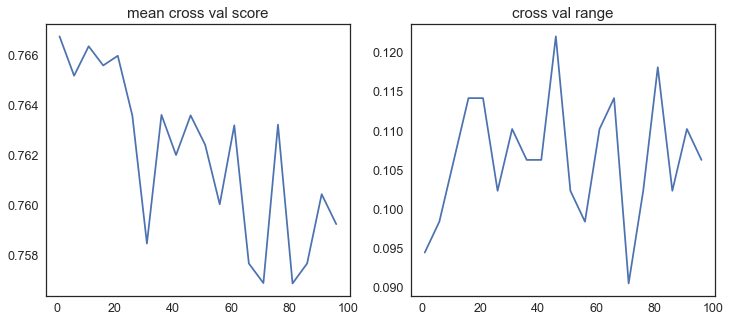

In [32]:
# tune min sample leaf
param_tune = []
for i in np.arange(1, 100, 5):
    rfc = ensemble.RandomForestClassifier(n_estimators=38, max_depth=7, max_features='log2', min_samples_leaf=i)
    rfc.fit(X, y)
    score = cross_val_score(rfc, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [33]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
0,1,0.766742,0.094488


In [34]:
start_time = time.clock()
rfc = ensemble.RandomForestClassifier(n_estimators=38, max_depth=7, max_features='log2', min_samples_leaf=1)
y_pred = rfc.fit(X, y).predict(X)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

confusion_matrix(y, y_pred)


Runtime: 0.11 seconds


array([[ 982,  285],
       [ 196, 1071]], dtype=int64)

In [35]:
cross_val_score(rfc, X, y, cv=10)

array([0.82283465, 0.79527559, 0.77952756, 0.73622047, 0.77559055,
       0.72047244, 0.74015748, 0.75396825, 0.75396825, 0.77777778])

In [36]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 285
Type 2 error (false negative): 196
Sensitivity: 0.8453038674033149
Specificity: 0.7750591949486977


# Logistic Regression

In [37]:
start_time = time.clock()
lr = LogisticRegression(C=1e9)
                      
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y = lr.predict(X)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))


print('\n Percentage accuracy')
print(lr.score(X, y))

confusion_matrix(y, y_pred)

Coefficients
[[-6.59089743e-02  9.26076698e-03  3.86470113e-04 -2.94120143e-02
  -4.07406966e-02  6.50537916e-02 -1.35206502e-01 -3.96294027e-02
  -3.05233081e-02 -7.71733816e-02  7.02067074e-03 -1.77471495e-01
   1.76523249e-01 -6.92044652e-02  1.48269581e-01 -6.92044652e-02
  -1.49217826e-01  8.60602866e-02 -6.92044652e-02 -8.70085322e-02
   6.29157421e-02 -6.92044652e-02 -6.38639878e-02  2.17354865e-01
  -6.92044652e-02 -2.18303110e-01 -2.03813837e-02 -6.92044652e-02
   1.94331380e-02 -7.63292445e-02 -6.92044652e-02  7.53809989e-02
   5.71563284e-01 -4.16092134e-02 -6.00106781e-01 -1.54408421e-01
   8.42557103e-02 -6.60381241e-02 -2.18972629e-01  3.15119594e-01
  -1.00261551e-01]]
[-0.07015271]

Runtime: 0.02 seconds

 Percentage accuracy
0.7651933701657458


array([[ 982,  285],
       [ 196, 1071]], dtype=int64)

In [38]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 285
Type 2 error (false negative): 196
Sensitivity: 0.8453038674033149
Specificity: 0.7750591949486977


In [39]:
feature_rank = pd.DataFrame({'features': X.columns, 'coefficients': fit.coef_.flatten()})
feature_rank['absolute_coef'] = feature_rank['coefficients'].abs()
feature_rank.sort_values(by=['absolute_coef'], inplace=True, ascending=False)
feature_rank = feature_rank.reset_index(drop=True)
feature_rank

,features,coefficients,absolute_coef
0,Contract_Two year,-0.600107,0.600107
1,Contract_Month-to-month,0.571563,0.571563
2,PaymentMethod_Electronic check,0.315120,0.315120
3,PaymentMethod_Credit card (automatic),-0.218973,0.218973
4,TechSupport_Yes,-0.218303,0.218303
5,TechSupport_No,0.217355,0.217355
6,InternetService_DSL,-0.177471,0.177471
7,InternetService_Fiber optic,0.176523,0.176523
8,PaperlessBilling_No,-0.154408,0.154408
9,OnlineSecurity_Yes,-0.149218,0.149218


In [40]:
cross_val_score(lr, X, y, cv=10)

array([0.81889764, 0.7992126 , 0.75984252, 0.74409449, 0.79527559,
       0.74409449, 0.72047244, 0.73015873, 0.73809524, 0.76190476])

In [41]:
from sklearn.feature_selection import RFE

# Pass any estimator to the RFE constructor
selector = RFE(lr)
selector = selector.fit(X, y)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
40,PaymentMethod_Mailed check,1
27,StreamingTV_No internet service,1
32,Contract_Month-to-month,1
24,TechSupport_No internet service,1
23,TechSupport_No,1
21,DeviceProtection_No internet service,1
39,PaymentMethod_Electronic check,1
19,OnlineBackup_Yes,1
18,OnlineBackup_No internet service,1
16,OnlineSecurity_Yes,1


# Logistic Regression with Ridge Regularization

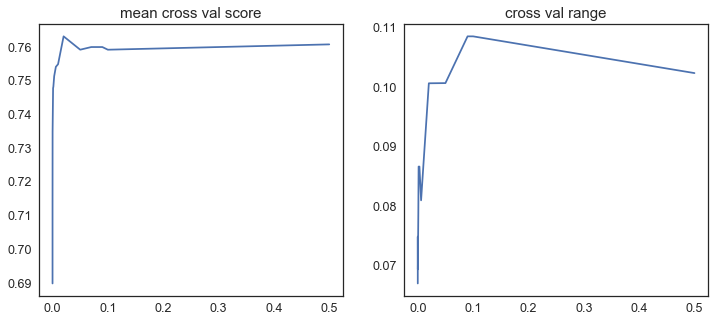

In [43]:
# tune l2 regularization
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.0015, 0.003, 0.006, 0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.5]:
#for i in [0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.01]:
    ridge = LogisticRegression(penalty='l2', C=i)
    ridge.fit(X, y)
    score = cross_val_score(ridge, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [125]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
11,0.01,0.754931,0.086614


In [44]:
start_time = time.clock()
ridge = LogisticRegression(penalty='l2', C=0.01)
                      
fit = ridge.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = ridge.predict(X)

print('\n Percentage accuracy')
print(ridge.score(X, y))
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))


confusion_matrix(y, y_pred)

Coefficients
[[-0.07595632  0.01445546  0.00039174 -0.0176869  -0.02343818  0.02407916
  -0.06520424  0.00581267 -0.04693775 -0.06835259  0.02722751 -0.12503687
   0.1260131  -0.04210131  0.13987553 -0.04210131 -0.1388993   0.06806585
  -0.04210131 -0.06708962  0.06768899 -0.04210131 -0.06671276  0.19133313
  -0.04210131 -0.1903569   0.00315074 -0.04210131 -0.00217452 -0.01454231
  -0.04210131  0.01551854  0.21861251 -0.07401041 -0.18572718 -0.12747652
   0.08635143 -0.05521767 -0.10761537  0.21403133 -0.09232336]]
[-0.04112508]

 Percentage accuracy
0.7620363062352012

Runtime: 0.02 seconds


array([[944, 323],
       [280, 987]], dtype=int64)

In [45]:
cross_val_score(ridge, X, y, cv=10)

array([0.80314961, 0.77559055, 0.74409449, 0.74409449, 0.77952756,
       0.71653543, 0.72440945, 0.71825397, 0.74206349, 0.8015873 ])

In [46]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 323
Type 2 error (false negative): 280
Sensitivity: 0.7790055248618785
Specificity: 0.745067087608524


# Logistic Regression with Lasso Regularization

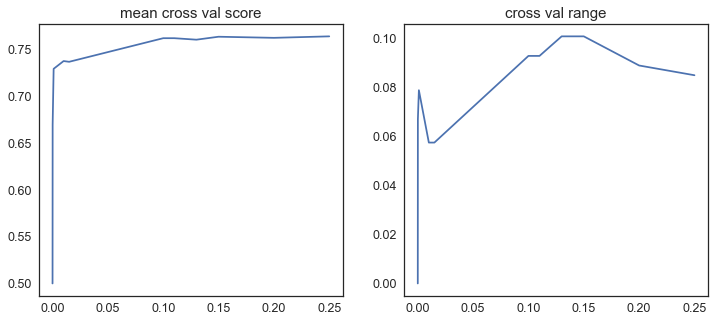

In [47]:
# tune l1 regularization
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.015, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.25]:
    lasso = LogisticRegression(penalty='l1', C=i)
    lasso.fit(X, y)
    score = cross_val_score(lasso, X, y, cv=10)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [48]:
param_tune

,parameter,mean_score,score_range
0,0.000001,0.500000,0.000000
1,0.000010,0.500000,0.000000
2,0.000100,0.669679,0.066929
3,0.001000,0.729284,0.078740
4,0.001000,0.729284,0.078740
5,0.010000,0.737580,0.057399
6,0.015000,0.736789,0.057399
7,0.100000,0.761995,0.092707
8,0.110000,0.761999,0.092707
9,0.120000,0.761205,0.096707


In [104]:
start_time = time.clock()

lasso = LogisticRegression(penalty='l1', C=0.01)
                      
fit = lasso.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
y_pred = lasso.predict(X)

print('\n Percentage accuracy')
print(lasso.score(X, y))
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

confusion_matrix(y, y_pred)

Coefficients
[[-0.09328982  0.02255698  0.00042714  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
[0.]

 Percentage accuracy
0.7371744277821626

Runtime: 0.02 seconds


array([[ 856,  411],
       [ 255, 1012]], dtype=int64)

In [105]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 411
Type 2 error (false negative): 255
Sensitivity: 0.7987371744277821
Specificity: 0.675611681136543


In [106]:
cross_val_score(lasso, X, y, cv=10)

array([0.76771654, 0.7519685 , 0.72440945, 0.72834646, 0.7480315 ,
       0.71653543, 0.71259843, 0.71031746, 0.75      , 0.76190476])

In [107]:
feature_rank = pd.DataFrame({'features': X.columns, 'coefficients': fit.coef_.flatten()})
feature_rank['absolute_coef'] = feature_rank['coefficients'].abs()
feature_rank.sort_values(by=['absolute_coef'], inplace=True, ascending=False)
feature_rank = feature_rank.reset_index(drop=True)
feature_rank

,features,coefficients,absolute_coef
0,tenure,-0.093290,0.093290
1,MonthlyCharges,0.022557,0.022557
2,TotalCharges,0.000427,0.000427
3,StreamingMovies_No internet service,0.000000,0.000000
4,TechSupport_No,0.000000,0.000000
5,TechSupport_No internet service,0.000000,0.000000
6,TechSupport_Yes,0.000000,0.000000
7,StreamingTV_No,0.000000,0.000000
8,StreamingTV_No internet service,0.000000,0.000000
9,StreamingTV_Yes,0.000000,0.000000


# SVM

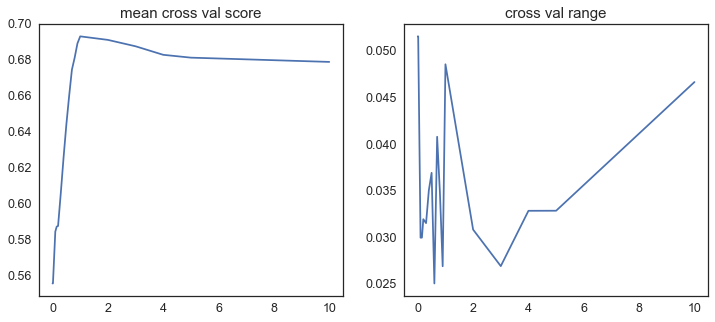

In [54]:
# tune C parameter
param_tune = []
for i in [0.000001, 0.00001, 0.0001, 0.001, 0.001, 0.01, 0.015, 0.1, 0.15, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5, 10]:
#for i in [0.01, 0.015, .05, 0.1, 0.15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]:
    svm = SVC(C=i)    
    svm.fit(X, y)
    score = cross_val_score(svm, X, y, cv=5)
    mean_score = score.mean()
    score_range = score.max() - score.min()
    param_tune.append([i, mean_score, score_range])

param_tune = pd.DataFrame(param_tune)
param_tune.columns = ['parameter', 'mean_score', 'score_range']

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(param_tune.parameter, param_tune.mean_score)
plt.title('mean cross val score')

plt.subplot(1, 2, 2)
plt.plot(param_tune.parameter, param_tune.score_range)
plt.title('cross val range')

plt.show()

In [55]:
param_tune[param_tune['mean_score'] == param_tune['mean_score'].max()]

,parameter,mean_score,score_range
17,1.0,0.692954,0.048543


In [56]:
param_tune[param_tune['score_range'] == param_tune['score_range'].min()]

,parameter,mean_score,score_range
13,0.6,0.659816,0.025023


In [138]:
# tune 
#param_tune = []
#for i in ['linear', 'poly', 'rbf']:
#    svm = SVC(C=.9, kernel=i)    
#    svm.fit(X, y)
#    score = cross_val_score(svm, X, y, cv=5)
#    mean_score = score.mean()
#    score_range = score.max() - score.min()
#    param_tune.append([i, mean_score, score_range])

#param_tune = pd.DataFrame(param_tune)
#param_tune.columns = ['parameter', 'mean_score', 'score_range']

#param_tune

In [57]:
y_1d = df_downsampled['Churn']
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 0.85, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.grid_scores_

In [58]:
svc_param_selection(X, y_1d, 5)

[mean: 0.58011, std: 0.00970, params: {'C': 0.001, 'gamma': 0.001},
 mean: 0.56038, std: 0.01120, params: {'C': 0.001, 'gamma': 0.01},
 mean: 0.53197, std: 0.02490, params: {'C': 0.001, 'gamma': 0.1},
 mean: 0.50710, std: 0.00388, params: {'C': 0.001, 'gamma': 1},
 mean: 0.58011, std: 0.00970, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.56038, std: 0.01120, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.53197, std: 0.02490, params: {'C': 0.01, 'gamma': 0.1},
 mean: 0.50710, std: 0.00388, params: {'C': 0.01, 'gamma': 1},
 mean: 0.68785, std: 0.01344, params: {'C': 0.1, 'gamma': 0.001},
 mean: 0.58998, std: 0.01128, params: {'C': 0.1, 'gamma': 0.01},
 mean: 0.55762, std: 0.01366, params: {'C': 0.1, 'gamma': 0.1},
 mean: 0.50710, std: 0.00388, params: {'C': 0.1, 'gamma': 1},
 mean: 0.73757, std: 0.02000, params: {'C': 0.85, 'gamma': 0.001},
 mean: 0.70876, std: 0.01280, params: {'C': 0.85, 'gamma': 0.01},
 mean: 0.61681, std: 0.01496, params: {'C': 0.85, 'gamma': 0.1},
 mean: 0.54223, std

In [109]:
svm = SVC(C=1, kernel='rbf', gamma=0.01)
cross_val_score(svm, X, y, cv=5)

array([0.71259843, 0.7007874 , 0.71541502, 0.69367589, 0.71343874])

In [60]:
svm = SVC(C=.85, kernel='linear')
cross_val_score(svm, X, y, cv=5)

array([0.79724409, 0.73425197, 0.75889328, 0.73913043, 0.7312253 ])

In [110]:
svm = SVC(C=1, kernel='linear')
cross_val_score(svm, X, y, cv=5)

array([0.78937008, 0.72834646, 0.78063241, 0.72924901, 0.743083  ])

In [61]:
start_time = time.clock()

y_pred = svm.fit(X, y).predict(X)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))

confusion_matrix(y, y_pred)


Runtime: 162.67 seconds


array([[952, 315],
       [283, 984]], dtype=int64)

In [62]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 315
Type 2 error (false negative): 283
Sensitivity: 0.77663772691397
Specificity: 0.7513812154696132


# Gradient Boost 

In [146]:
y_1d = df_downsampled['Churn']
# Find number of estimators
param_test1 = {'n_estimators':np.arange(1, 150), 'max_depth': np.arange(2,16)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',subsample=0.8), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y_1d)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.71983, std: 0.01849, params: {'max_depth': 2, 'n_estimators': 1},
  mean: 0.72649, std: 0.02498, params: {'max_depth': 2, 'n_estimators': 2},
  mean: 0.74622, std: 0.03117, params: {'max_depth': 2, 'n_estimators': 3},
  mean: 0.73716, std: 0.02903, params: {'max_depth': 2, 'n_estimators': 4},
  mean: 0.73203, std: 0.03188, params: {'max_depth': 2, 'n_estimators': 5},
  mean: 0.74229, std: 0.02648, params: {'max_depth': 2, 'n_estimators': 6},
  mean: 0.74662, std: 0.02613, params: {'max_depth': 2, 'n_estimators': 7},
  mean: 0.73873, std: 0.02264, params: {'max_depth': 2, 'n_estimators': 8},
  mean: 0.75491, std: 0.03309, params: {'max_depth': 2, 'n_estimators': 9},
  mean: 0.74819, std: 0.03401, params: {'max_depth': 2, 'n_estimators': 10},
  mean: 0.75016, std: 0.02746, params: {'max_depth': 2, 'n_estimators': 11},
  mean: 0.75332, std: 0.03501, params: {'max_depth': 2, 'n_estimators': 12},
  mean: 0.75175, std: 0.02652, params: {'max_depth': 2, 'n_estimators': 13},
  mean: 

In [95]:
param_test2 = {'min_samples_split': np.arange(50,1001,10)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=75, max_depth=8, min_samples_leaf=50, max_features='sqrt', subsample=0.7), 
param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5)
gsearch2.fit(X,y_1d)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.76556, std: 0.02802, params: {'min_samples_split': 50},
  mean: 0.76241, std: 0.02195, params: {'min_samples_split': 60},
  mean: 0.76121, std: 0.02544, params: {'min_samples_split': 70},
  mean: 0.76516, std: 0.02237, params: {'min_samples_split': 80},
  mean: 0.76516, std: 0.02172, params: {'min_samples_split': 90},
  mean: 0.75529, std: 0.02294, params: {'min_samples_split': 100},
  mean: 0.76555, std: 0.02597, params: {'min_samples_split': 110},
  mean: 0.76161, std: 0.02776, params: {'min_samples_split': 120},
  mean: 0.75964, std: 0.02470, params: {'min_samples_split': 130},
  mean: 0.76516, std: 0.02016, params: {'min_samples_split': 140},
  mean: 0.75925, std: 0.02008, params: {'min_samples_split': 150},
  mean: 0.76240, std: 0.02008, params: {'min_samples_split': 160},
  mean: 0.76910, std: 0.02290, params: {'min_samples_split': 170},
  mean: 0.76517, std: 0.02789, params: {'min_samples_split': 180},
  mean: 0.76083, std: 0.01753, params: {'min_samples_split': 190},


In [96]:
param_test3 = {'min_samples_leaf': np.arange(20,71)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=450, n_estimators=75, max_depth=8, max_features='sqrt', subsample=0.7), 
param_grid = param_test3, scoring='accuracy', n_jobs=4, iid=False, cv=5)
gsearch3.fit(X,y_1d)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.76832, std: 0.02176, params: {'min_samples_leaf': 20},
  mean: 0.76989, std: 0.02508, params: {'min_samples_leaf': 21},
  mean: 0.76517, std: 0.02111, params: {'min_samples_leaf': 22},
  mean: 0.77345, std: 0.02665, params: {'min_samples_leaf': 23},
  mean: 0.76912, std: 0.02471, params: {'min_samples_leaf': 24},
  mean: 0.76911, std: 0.02142, params: {'min_samples_leaf': 25},
  mean: 0.76674, std: 0.02573, params: {'min_samples_leaf': 26},
  mean: 0.76872, std: 0.02203, params: {'min_samples_leaf': 27},
  mean: 0.76596, std: 0.02480, params: {'min_samples_leaf': 28},
  mean: 0.76990, std: 0.02323, params: {'min_samples_leaf': 29},
  mean: 0.77069, std: 0.02149, params: {'min_samples_leaf': 30},
  mean: 0.77030, std: 0.02258, params: {'min_samples_leaf': 31},
  mean: 0.76833, std: 0.02117, params: {'min_samples_leaf': 32},
  mean: 0.76714, std: 0.02732, params: {'min_samples_leaf': 33},
  mean: 0.76872, std: 0.02475, params: {'min_samples_leaf': 34},
  mean: 0.76911, std: 0.0

In [97]:
param_test5 = {'subsample':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=75,max_depth=8,min_samples_split=450, min_samples_leaf=42,max_features='sqrt'),
param_grid = param_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X,y_1d)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.76950, std: 0.02485, params: {'subsample': 0.5},
  mean: 0.76872, std: 0.02540, params: {'subsample': 0.55},
  mean: 0.77069, std: 0.02286, params: {'subsample': 0.6},
  mean: 0.76989, std: 0.02584, params: {'subsample': 0.65},
  mean: 0.77187, std: 0.02564, params: {'subsample': 0.7},
  mean: 0.76871, std: 0.02398, params: {'subsample': 0.75},
  mean: 0.76754, std: 0.02035, params: {'subsample': 0.8},
  mean: 0.76793, std: 0.02228, params: {'subsample': 0.85},
  mean: 0.76754, std: 0.02285, params: {'subsample': 0.9},
  mean: 0.76438, std: 0.02646, params: {'subsample': 0.95},
  mean: 0.76753, std: 0.02213, params: {'subsample': 1}],
 {'subsample': 0.7},
 0.7718682891911238)

In [98]:
boost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=75, max_depth=8, min_samples_split=450, min_samples_leaf=42,max_features='sqrt',subsample=0.7)
cross_val_score(boost, X, y_1d, cv=10, scoring='accuracy')

array([0.83858268, 0.79527559, 0.7519685 , 0.75984252, 0.78740157,
       0.72834646, 0.73228346, 0.76984127, 0.75396825, 0.78174603])

In [101]:
start_time = time.clock()

boost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=75, max_depth=8, min_samples_split=450, min_samples_leaf=42,max_features='sqrt',subsample=0.7)
y_pred = boost.fit(X, y_1d).predict(X)
print('\nRuntime: {} seconds'.format(round((time.clock()-start_time),2)))


confusion_matrix(y, y_pred)


Runtime: 0.14 seconds


array([[ 951,  316],
       [ 224, 1043]], dtype=int64)

In [102]:
confusion = confusion_matrix(y, y_pred)
print('Type 1 error (false positive): {}'.format(confusion[0][1]))
print('Type 2 error (false negative): {}'.format(confusion[1][0]))
print('Sensitivity: {}'.format(confusion[1][1] / confusion[1].sum()))
print('Specificity: {}'.format(confusion[0][0] / confusion[0].sum()))

Type 1 error (false positive): 316
Type 2 error (false negative): 224
Sensitivity: 0.8232044198895028
Specificity: 0.7505919494869772


# PCA

Covariance Matrix:
 [[ 5.81099223e+02  1.67993223e+02  4.64128760e+04 ...  2.19574544e+00
  -2.48827739e+00 -2.15687729e+00]
 [ 1.67993223e+02  8.57576532e+02  3.87433850e+04 ...  4.21161949e-01
   4.20928624e+00 -5.12299824e+00]
 [ 4.64128760e+04  3.87433850e+04  5.02106038e+06 ...  1.72051960e+02
  -9.07831395e+01 -2.61282432e+02]
 ...
 [ 2.19574544e+00  4.21161949e-01  1.72051960e+02 ...  1.49889649e-01
  -7.09241018e-02 -4.14388010e-02]
 [-2.48827739e+00  4.20928624e+00 -9.07831395e+01 ... -7.09241018e-02
   2.37176297e-01 -8.72442714e-02]
 [-2.15687729e+00 -5.12299824e+00 -2.61282432e+02 ... -4.14388010e-02
  -8.72442714e-02  1.74845006e-01]]


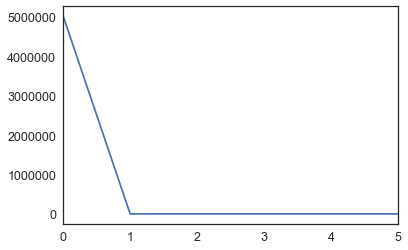

In [69]:
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.xlim((0, 5))
plt.show()

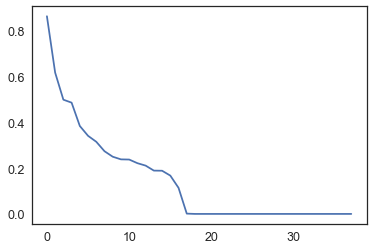

In [94]:
pca = PCA(n_components=X.shape[1])
X_pca = pca.fit(X)
plt.plot(X_pca.explained_variance_[3:])


In [90]:
sklearn_pca = PCA(n_components=2)
pca_components = sklearn_pca.fit_transform(X)

In [103]:
cross_val_score(boost, pca_components, y_1d, cv=10, scoring='accuracy')

array([0.78346457, 0.79527559, 0.73622047, 0.72834646, 0.75590551,
       0.72834646, 0.72834646, 0.73015873, 0.72222222, 0.75396825])